In [133]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [134]:
df = pd.read_csv("UCI_Credit_Card.csv")
print(df.shape)

(30000, 25)


In [135]:
print(df.values[0])
print(df.iloc[:,:-1].head())

[ 1.000e+00  2.000e+04  2.000e+00  2.000e+00  1.000e+00  2.400e+01
  2.000e+00  2.000e+00 -1.000e+00 -1.000e+00 -2.000e+00 -2.000e+00
  3.913e+03  3.102e+03  6.890e+02  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  6.890e+02  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.000e+00]
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

     ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0    ...         689.0        0.0        0.0        0.0       0.0     689.0   
1    ...        2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
2    ..

In [154]:
from sklearn.model_selection import train_test_split 

#values converts all the attribute of same dtype with mixed dtypes like int64,float64,str\object,etc -> object(all)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

print(type(x_train))
print(x_train)

<class 'numpy.ndarray'>
[[2.8466e+04 2.4000e+05 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.7623e+04 5.0000e+04 2.0000e+00 ... 9.8100e+03 6.6000e+02 2.9800e+03]
 [2.8377e+04 5.0000e+04 2.0000e+00 ... 2.0040e+03 3.5000e+03 0.0000e+00]
 ...
 [8.6100e+02 5.0000e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.5796e+04 7.0000e+04 2.0000e+00 ... 1.2000e+03 0.0000e+00 1.2000e+03]
 [2.3655e+04 1.6000e+05 2.0000e+00 ... 1.6500e+03 1.4200e+04 1.5000e+03]]


In [163]:
# RANDOM FOREST CLASSIFICATION
#For Large Dataset or Missing Values Dataset Random Forest shows better ACCURACY 
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100)
modelRF.fit(x_train,y_train)
predictedRF = modelRF.predict(x_test)
actualRF = y_test
print(modelRF.score(x_test,y_test)*100,"%")

81.56666666666666 %


In [164]:
# K-NEAREST NEGIHBORS
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=30)
modelKNN.fit(x_train,y_train)
predictedKNN = modelKNN.predict(x_test)
actualKNN = y_test
print(modelKNN.score(x_test,y_test)*100,"%")

78.04444444444445 %


Random Forest:
[[6626  414]
 [1245  715]]

K-Nearest Neighbors:
[[6910  130]
 [1846  114]]


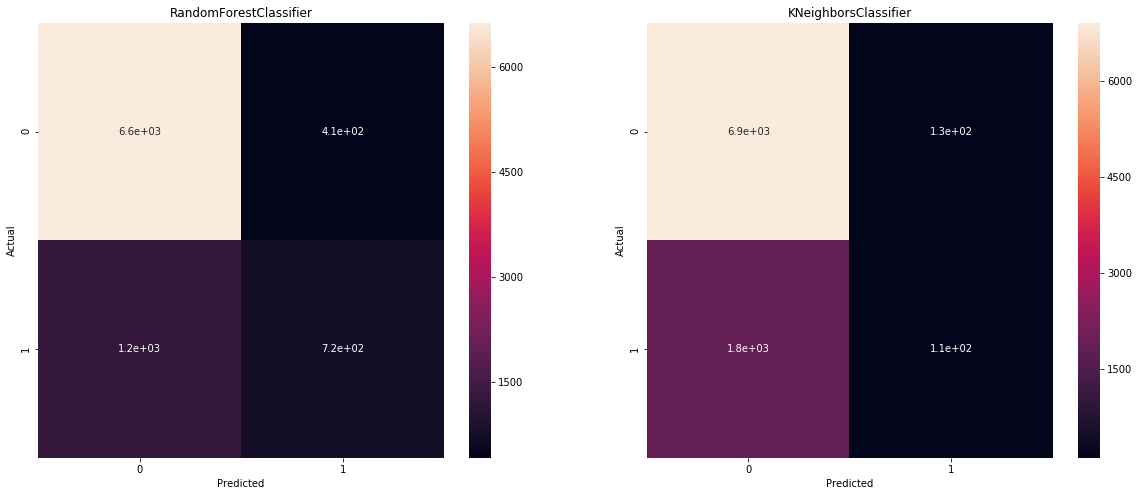

In [187]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
cmRF = confusion_matrix(actualRF,predictedRF)
sns.heatmap(cmRF,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier")
print("Random Forest:")
print(cmRF)
print()

plt.subplot(1,2,2)
cmKNN = confusion_matrix(actualKNN,predictedKNN)
sns.heatmap(cmKNN,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNeighborsClassifier")
print("K-Nearest Neighbors:")
print(cmKNN)

plt.show()